In [1]:
from imageio import imread
from matplotlib import pyplot as plt
import numpy as np

#### Some useful/advanced numpy online resources (for your interests only):
###### Numpy API: https://docs.scipy.org/doc/numpy/reference/
###### Stanford Python-Numpy Tutorial: http://cs231n.github.io/python-numpy-tutorial/

# 2.3 Convolutional Filtering 

Raw input image.


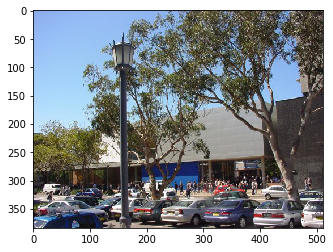

In [2]:
%matplotlib inline
print('Raw input image.')
raw_img = np.array(imread('parking.jpg'))
plt.figure(1)
plt.imshow(raw_img)
plt.show()

In [3]:
# Define a map/dict in python
# insert elements (key:value) into it
filters = {}
# TODO: initialize 3*3 average and sharpen filters as numpy arrays based on
#       the definition of both filters, you should store
avgFilter = np.array([[1.0/9,1.0/9,1.0/9], 
                      [1.0/9,1.0/9,1.0/9], 
                      [1.0/9,1.0/9,1.0/9]])

#avgFilter = np.array([[1,1,1], 
#                      [1,1,1], 
#                      [1,1,1]])


shpFilter = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])


filters['average'] = avgFilter
filters['sharpen'] = shpFilter

In [12]:
def convolution_operation(img, kernel):
    # Define two helper functions via using nested functions
    def covolution_helper(neighbour, kernel):
        # sum of product(element-wise matrix multiplication)
        return np.sum(np.multiply(neighbour, kernel))
    def preprocessing_padding_helper(img, kernel_size):
        pad_size = int(kernel_size / 2)
        # specify the pading for three dimensions
        # ((1,1), (1,1), (0,0)) => 1 padding for left and right, 
        #                          1 padding for top and bottom, 
        #                          no padding for color channels
        padding_3_dims = ((pad_size, pad_size), (pad_size, pad_size), (0, 0))
        img_padded = np.pad(img, padding_3_dims, 'constant', constant_values=0)
        print('*Padding: FROM ', img.shape,' TO ',img_padded.shape)
        return img_padded
    processed_img = np.zeros(img.shape)
    kernel_size = kernel.shape[0]
    img_padded = preprocessing_padding_helper(img, kernel_size)
    # Using 2-for loop to perform matrix operation (updating pixel values)
    for row_idx in range(processed_img.shape[0]):
        for col_idx in range(processed_img.shape[1]):
            ################  TODO  #################
            #  perform convolution for each channel individually and seperately
            #    - Pick a targeting pixel
            #    - Fetch Neighbourhood by slicing operation, whose size matching up with the size of kernel
            #    - Calculate new pixel value via convolution operation
            #    - Remember to put on constraints for pixel values: 1. Range[0, 255]  2. Integer
            
            pad_size = int(kernel_size / 2)
            
          #  print(pad_size)
            
            rArea = img_padded[row_idx: row_idx+pad_size +2, col_idx : col_idx+pad_size +2, 0]
          #  print(img_padded.shape)
          #  print(rArea)
            
          #  print(kernel)
            
            r = covolution_helper(rArea, kernel)
            if r < 0:
                r = 0
            elif r > 255:
                r = 255
            
            gArea = img_padded[row_idx : row_idx+pad_size +2, col_idx : col_idx+pad_size +2, 1]
            
            g = covolution_helper(gArea, kernel)
            if g < 0:
                g = 0
            elif g > 255:
                g = 255
            
            bArea = img_padded[row_idx : row_idx+pad_size +2, col_idx : col_idx+pad_size +2, 2]
            
            b = covolution_helper(bArea, kernel)
            if b < 0:
                b = 0
            elif b > 255:
                b = 255
            
            processed_img[row_idx][col_idx][0] = int(r)
            processed_img[row_idx][col_idx][1] = int(g)
            processed_img[row_idx][col_idx][2] = int(b)
            
    processed_img = np.uint8(processed_img)   # You can comment off this constraint code to see the effects
    return processed_img

### 2.3.1  Convolutional Filter Implementation - Week2 Lab Exercise Submission

You can now use the generate_results() function below to generate your outputs for submission.

In [13]:
'''
    generate_results function is a helper function for you to generate
    the output images of lab exercise submission
    - Function Input: 
            -            wk:           int, indicates a specific week's lab exercise
            -          name:           str, the name of the student
            -           SID:           int, the SID of the student
            -       raw_img: numpy.ndarray, raw image
            -   output_imgs:          dict, stores the titles and outputs 
                                            as keys and values respectively.
                             i.e. you should store your outputs as {'[task name]':[numpy array],...}
                             
            -       channel:           int, the number of color channels
                             i.e. channel=1 indicates the images are grey images
                                  channel=3 indicates the images are RGB images
    - Function Usage:
            - Supply all the arguments with the correct types and a result image
              will be generated.
    - Tips:
            - You can right click the result image plot to save the image or 
              you can take a screenshoot for the submission.
'''
def generate_results(wk, name, SID, raw_img, output_imgs, channel):
    img_size = raw_img.shape
    x = img_size[0]
    y = img_size[1]
    
    # resize input image to a suitable size
    while x > 10:
        x /= (x / 10)
        y /= (y / 10)

    # Generate one axes each for the original image and all output images
    fig, axs = plt.subplots(1, len(output_imgs)+1, figsize=(x,y))
    
    # Plot the original image
    if channel == 1:
        axs[0].imshow(raw_img, cmap='gray')
    elif channel == 3:
        axs[0].imshow(raw_img)
    axs[0].text(0.5,-0.1, 'Original Image', size=12, ha="center", transform=axs[0].transAxes)
    axs[0].axis('off')
    
    # Plot each output image
    tasks = list(output_imgs.keys())
    for i in range(1,len(tasks)+1):
        if channel == 1:
            axs[i].imshow(output_imgs[tasks[i-1]], cmap='gray')
        elif channel == 3:
            axs[i].imshow(output_imgs[tasks[i-1]])
        axs[i].text(0.5,-0.1, tasks[i-1], size=12, ha="center", transform=axs[i].transAxes)
        axs[i].axis('off')

    fig.suptitle("Week %i Lab Exercise\n %s SID:%i"%(wk, name, SID),x=0.5,y=0.75)
    plt.tight_layout()
    plt.show()
    

*Padding: FROM  (384, 512, 3)  TO  (474, 602, 3)


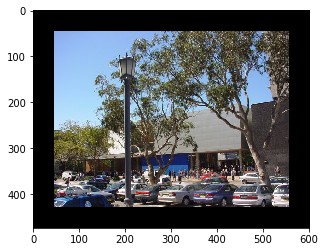

ValueError: operands could not be broadcast together with shapes (91,91) (3,3) 

In [14]:
# Generate filtered results
avg_img = convolution_operation(raw_img, filters['average'])
sharpen_img = convolution_operation(raw_img, filters['sharpen']) 
output_imgs = {'Average Filter': avg_img, 
               'Sharpen Filter': sharpen_img}

# Now call generate_results() and provide the parameters as required

generate_results(2, "Shuwei Zhang", 470425437, raw_img, output_imgs, 3)

# 2.4 Histogram Equalization

In [ ]:
# Functions Declarations
def apply_histogram_equalization_step1_rgb2gray(img):
    # TODO: Step1 - Convert to greyscale if required
    
    def def rgb2gray(img):
    return np.dot(img[...,:3], [0.21267, 0.715160, 0.072169])

    img_grey = np.zeros(img.shape[:2])
    
    gray = rgb2gray(img)    
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()
    
    return img_grey
def apply_histogram_equalization_step2_histogram(img, visualize=False):
    # TODO: Step2 - Compute the Histogram of the input image
    histogram = [0] * 256

    return histogram
def apply_histogram_equalization_step3_cdf(histogram, visualize=False):
    # TODO: Step3 - Compute the cumulative distribution function (CDF) of the histogram
    cdf = []

    return cdf
def apply_histogram_equalization_step4_rescaling(img, cdf):
    # TODO: Step4 - Rescale the histogram
    def rescale_function(v):
        return (float(cdf[int(v)] - cdf_min) / (1 - cdf_min)) * (L-1)

    return np.uint8(img)

In [ ]:
print('Raw Image')
img = imread('parking.jpg')
plt.figure(4)
plt.imshow(img)
plt.show()

### Baseline - Convert RGB to Grayscale, then perform HE

In [ ]:
print('[Step1]: Convert to greyscale if necessary')
img_grey = apply_histogram_equalization_step1_rgb2gray(img)
plt.figure(5)
plt.imshow(img_grey, cmap='gray')
plt.show()

In [ ]:
print('[Step2]: Compute the Histogram of the input image')
current_histogram = apply_histogram_equalization_step2_histogram(img_grey, visualize=True)

In [ ]:
print('[Step3]:  Compute the cumulative distribution function (CDF) of the histogram')
cdf = apply_histogram_equalization_step3_cdf(current_histogram, visualize=True)

In [ ]:
print('[Step4]: Rescale the histogram')
updated_img = apply_histogram_equalization_step4_rescaling(img_grey, cdf)

In [ ]:
print('Output Image Performed with HE')
plt.figure(6)
plt.imshow(updated_img, cmap='gray')
plt.show()

In [ ]:
# Now we observe the effect of HE by checking the histogram of updated_img
print('Rescaled histogram of image performed with HE')
current_histogram = apply_histogram_equalization_step2_histogram(updated_img, visualize=True)

### 2.4.1 Histogram Equalization on RGB image

In [ ]:
print('Raw Image')
img = imread('parking.jpg')
plt.figure(7)
plt.imshow(img)
plt.show()

In [ ]:
# RED Channel
print('Perform HE on Red channel')
img_r = np.copy(img[:,:,0])
raw_histogram_r = apply_histogram_equalization_step2_histogram(img_r, visualize=False)
cdf_r = apply_histogram_equalization_step3_cdf(raw_histogram_r, visualize=False)
img_updated_r = apply_histogram_equalization_step4_rescaling(img_r, cdf_r)
# GREEN Channel
print('Perform HE on Green channel')
img_g = np.copy(img[:,:,1])
raw_histogram_g = apply_histogram_equalization_step2_histogram(img_g, visualize=False)
cdf_g = apply_histogram_equalization_step3_cdf(raw_histogram_g, visualize=False)
img_updated_g = apply_histogram_equalization_step4_rescaling(img_g, cdf_g)
# BLUE Channel
print('Perform HE on Blue channel')
img_b = np.copy(img[:,:,2])
raw_histogram_b = apply_histogram_equalization_step2_histogram(img_b, visualize=False)
cdf_b = apply_histogram_equalization_step3_cdf(raw_histogram_b, visualize=False)
img_updated_b = apply_histogram_equalization_step4_rescaling(img_b, cdf_b)

In [ ]:
# Histogram of raw image
def plot_histogram_for_rgb_img(histogram_r, histogram_g, histogram_b):
    def remove_zero_for_visualization_purpose(histogram):
        x = [] 
        y = []
        for index, count in enumerate(histogram):
            if count == 0:
                continue
            x.append(index)
            y.append(count)
        return x, y
    plt.figure()
    x_r, y_r = remove_zero_for_visualization_purpose(histogram_r)
    plt.scatter(x_r, y_r, color='r')
    x_g, y_g = remove_zero_for_visualization_purpose(histogram_g)
    plt.scatter(x_g, y_g, color='g')
    x_b, y_b = remove_zero_for_visualization_purpose(histogram_b)
    plt.scatter(x_b, y_b, color='b')
    plt.xlim(0, 255)
    plt.xlabel('PixelValue')
    plt.ylabel('Histogram')
    plt.show()
print('Histogram for raw RGB image')
plot_histogram_for_rgb_img(raw_histogram_r, raw_histogram_g, raw_histogram_b)

In [ ]:
# Combine RGB channels back together
print('Output Image Performed with HE')
img_updated = np.zeros(img.shape)
img_updated[:, :, 0] = img_updated_r[:, :]
img_updated[:, :, 1] = img_updated_g[:, :]
img_updated[:, :, 2] = img_updated_b[:, :]
img_updated = np.uint8(img_updated)
plt.figure(11)
plt.imshow(img_updated)
plt.show()

In [ ]:
# Histogram of updated image
# Now we observe the effect of HE by checking the histogram of updated_img
print('Rescaled histogram of image performed with HE')
current_histogram_r = apply_histogram_equalization_step2_histogram(img_updated[:,:,0], visualize=False)
current_histogram_g = apply_histogram_equalization_step2_histogram(img_updated[:,:,1], visualize=False)
current_histogram_b = apply_histogram_equalization_step2_histogram(img_updated[:,:,2], visualize=False)
plot_histogram_for_rgb_img(current_histogram_r, current_histogram_g, current_histogram_b)